# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame({'Cities': cities})
cities_df.head(5)

,Cities
0,tucuma
1,georgetown
2,ushuaia
3,necochea
4,bluff


In [4]:
# api_key = api_keys.py
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"


#Printing log of city number and city name
print("Beginning Data Retrieval")
print("---------------------------")

city_number = 1
count=0
for index, row in cities_df.iterrows():
    #get city from dataframe
    cities = row["Cities"]
#     #use this to stop at 50, data was taking to long to load.
#     if count > 50:
#         break
#     count+=1
    
    # assemble url and make API request
    
    query_url = base_url + "&q=" + cities + "&APPID=" + api_key + "&units=imperial"
    

    try:
        response = requests.get(query_url).json()
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index,"Country"] = response["sys"]["country"]
        cities_df.loc[index,"Date"] = response["dt"]
        cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        cities_df.loc[index,"Latitude"] = response["coord"]["lat"]
        cities_df.loc[index,"Longitude"] = response["coord"]["lon"]
        cities_df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index,"Windspeed"] = response["wind"]["speed"]
        
        city_name = response["name"]
        print(f"Processing City Number {city_number} | {city_name}")
        
        city_number+=1
        
        # Adding sleep method in the loop to not over exceed rate limit of API
        time.sleep(1)
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

Beginning Data Retrieval
---------------------------
City not found. Skipping...
Processing City Number 1 | Georgetown
Processing City Number 2 | Ushuaia
Processing City Number 3 | Necochea
Processing City Number 4 | Bluff
Processing City Number 5 | Vaini
Processing City Number 6 | Pochutla
Processing City Number 7 | Rikitea
Processing City Number 8 | Sao Filipe
Processing City Number 9 | Busselton
Processing City Number 10 | Seminole
Processing City Number 11 | Codrington
City not found. Skipping...
Processing City Number 12 | Den Helder
Processing City Number 13 | Cape Town
Processing City Number 14 | Palmer
Processing City Number 15 | Kodiak
Processing City Number 16 | Laguna
Processing City Number 17 | Hobart
City not found. Skipping...
Processing City Number 18 | Tamandare
Processing City Number 19 | Dikson
Processing City Number 20 | Saint-Philippe
Processing City Number 21 | Victoria
City not found. Skipping...
Processing City Number 22 | Bredasdorp
Processing City Number 23 | K

In [6]:
cities_df.count()

Cities        630
Cloudiness     42
Country        42
Date           42
Humidity       42
Latitude       42
Longitude      42
Max Temp       42
Windspeed      42
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Export city data to CSV
# cities_df.to_csv('output_data/city_data.csv')
#     cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
#         cities_df.loc[index,"Country"] = response["sys"]["country"]
#         cities_df.loc[index,"Date"] = response["dt"]
#         cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
#         cities_df.loc[index,"Latitude"] = response["coord"]["lat"]
#         cities_df.loc[index,"Longitude"] = response["coord"]["lon"]
#         cities_df.loc[index,"Max Temp"] = response["main"]["temp_max"]
#         cities_df.loc[index,"Windspeed"] = response["wind"]["speed"]
        

In [14]:
# cities_df = pd.DataFrame({'city_name': city_name, 'latitude': latitude,'latitude': latitude,'temperature': temperature, 'humidity': humidity, 'cloudiness': cloudiness,'windspeed':windspeed})
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Windspeed
0,tucuma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,georgetown,86.0,GY,1.572400e+09,88.0,6.80,-58.16,80.60,6.93
2,ushuaia,100.0,AR,1.572400e+09,39.0,-54.81,-68.31,46.40,4.32
3,necochea,68.0,AR,1.572400e+09,91.0,-38.55,-58.74,55.99,1.99
4,bluff,68.0,AU,1.572400e+09,39.0,-23.58,149.07,84.67,17.60


In [13]:
cities_df.dropna()
new_citiesdf = cities_df.dropna()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

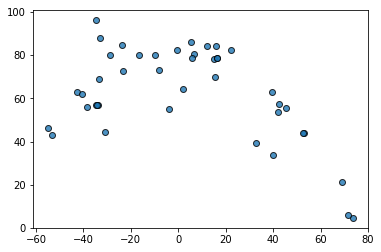

In [16]:
ltd = new_citiesdf["Latitude"]
mtemp = new_citiesdf["Max Temp"]
plt.scatter(ltd,
            mtemp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.show()

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

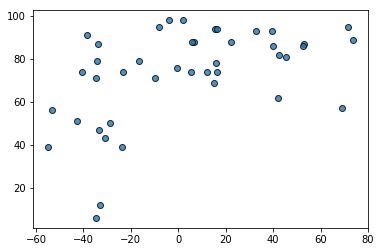

In [18]:
ltd = new_citiesdf["Latitude"]
hum = new_citiesdf["Humidity"]
plt.scatter(ltd,
            hum,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.show


#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

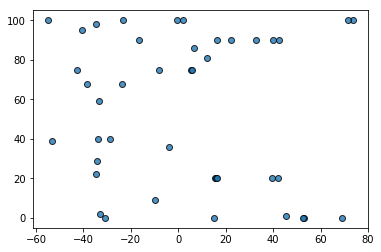

In [19]:
ltd = new_citiesdf["Latitude"]
cld = new_citiesdf["Cloudiness"]
plt.scatter(ltd,
            cld,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

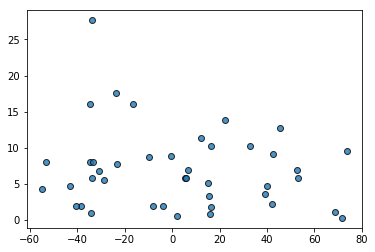

In [20]:
ltd = new_citiesdf["Latitude"]
ws = new_citiesdf["Windspeed"]
plt.scatter(ltd,
            ws,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.show